<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_map_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>

# Térképi megjelenítés Python programmal 2


## ipyleaflet és Smopy modul használata

<https://klajosw.blogspot.com/>


---


---
## ipyleaflet minta

https://ipyleaflet.readthedocs.io/en/latest/api_reference/basemaps.html

---

In [ ]:
from ipyleaflet import Map, Marker, basemaps, Polyline, Polygon,CircleMarker
## 47.4274709, 19.208095 ## magyarország, Budapest
pos = [47.4274709, 19.208095]

## Térkép tipusok
#Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)
#Map(basemap=basemaps.OpenStreetMap.HOT, center=center, zoom=zoom)
#Map(basemap=basemaps.OpenStreetMap.BlackAndWhite, center=center, zoom=zoom)
#Map(basemap=basemaps.Hydda.Full, center=center, zoom=zoom)
#Map(basemap=basemaps.Esri.WorldStreetMap, center=center, zoom=zoom)
#Map(basemap=basemaps.HikeBike.HikeBike, center=center, zoom=zoom)
#Map(basemap=basemaps.Strava.All, center=center, zoom=zoom)
#Map(basemap=basemaps.Strava.Ride, center=center, zoom=zoom)
#Map(basemap=basemaps.Strava.Run, center=center, zoom=zoom)
#Map(basemap=basemaps.Strava.Water, center=center, zoom=zoom)
#Map(basemap=basemaps.Strava.Winter, center=center, zoom=zoom)
#Map(basemap=basemaps.Stamen.Terrain, center=center, zoom=zoom)
#Map(basemap=basemaps.Esri.WorldImagery, center=center, zoom=zoom)
#Map(basemap=basemaps.Esri.NatGeoWorldMap, center=center, zoom=zoom)

m = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=pos, zoom=15)

## marker /// nem mozgatható
marker = Marker(location=pos,
                rise_on_hover=True,
                title="Here I am!",
                draggable=False          
                )
m += marker  ## m.add_layer(marker);

##vonal
line = Polyline(
    locations=[
        [47.429, 19.209],
        [47.424, 19.203],
        [47.422, 19.205]
    ],
    color="red" ,
    fill=False
)
m += line  ## m.add_layer(line);

polygon = Polygon(
    locations=[(47.428, 19.203), (47.427, 19.201), (47.426, 19.205)],
    color="green",
    fill_color="blue"
)
m += polygon 

circle_marker = CircleMarker()
circle_marker.location = (47.428, 19.203)
circle_marker.radius = 30
circle_marker.color = "blue"
circle_marker.fill_color = "red"
m += circle_marker

m  ## Megjelenítés

Map(center=[47.4274709, 19.208095], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [ ]:
import os
import json
import random
import requests

from ipyleaflet import Map, GeoJSON

if not os.path.exists('europe_110.geo.json'):
    url = 'https://github.com/jupyter-widgets/ipyleaflet/raw/master/examples/europe_110.geo.json'
    r = requests.get(url)
    with open('europe_110.geo.json', 'w') as f:
        f.write(r.content.decode("utf-8"))

with open('europe_110.geo.json', 'r') as f:
    data = json.load(f)

def random_color(feature):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }


# Create a geodata
geodata =''' GeoData(geo_dataframe = europe, 
 style={'color': 'black', 'fillColor': '#E0D071', 'opacity':0.03, 'weight':1.9, 'dashArray':2, 'fillOpacity':0.6},
 hover_style={'fillColor': '#b08a3e' , 'fillOpacity': 0.8},
 name = 'Countries')
'''

## 47.4274709, 19.208095 ## magyarország, Budapest
pos = [47.4274709, 19.208095]

m = Map(basemap=basemaps.Esri.WorldImagery, center=pos, zoom=3)

geo_json = GeoJSON(
    data=data,
    style={
        'opacity': 1, 'dashArray': '9', 'fillOpacity': 0.1, 'weight': 1
    },
    hover_style={
        'color': 'red', 'dashArray': '0', 'fillOpacity': 0.5
    },
    style_callback=random_color
)


m += geo_json   ## m.add_layer(geo_json)

m

Map(center=[47.4274709, 19.208095], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [ ]:
from ipyleaflet import Map, Marker, MarkerCluster

## 47.4274709, 19.208095 ## magyarország, Budapest
pos = [47.4274709, 19.208095]

m = Map(center=pos, zoom=16)

marker1 = Marker(location=(47.427, 19.208))
marker2 = Marker(location=(47.428, 19.208))
marker3 = Marker(location=(47.429, 19.208))
marker4 = Marker(location=(47.428, 19.207))
marker5 = Marker(location=(47.428, 19.207))
marker6 = Marker(location=(47.429, 19.207))

marker_cluster = MarkerCluster(
    markers=(marker1, marker2, marker3, marker4, marker5, marker6)
)

m += marker_cluster   ## m.add_layer(marker_cluster);

m

Map(center=[47.4274709, 19.208095], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

---

## smopy minta

---

Lowered zoom level to keep map size reasonable. (z = 8)


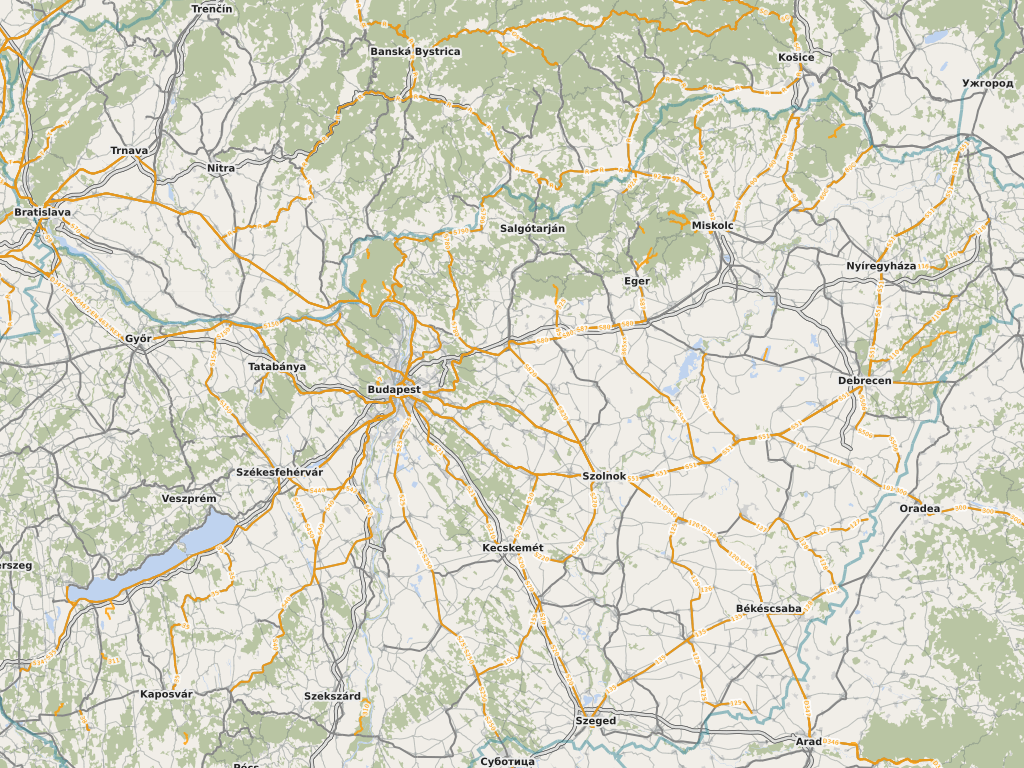

In [ ]:
import smopy
%matplotlib inline
## 47.4274709!4d19.208095 ## magyarország, Budapest
#map = smopy.Map((47., 18., 48., 21.), z=8)  ## Sajnos a Max nagyitás csak 8 as lehet !!!

map = smopy.Map((47., 18., 48., 21.), 
### Térkép szolgáltatók kiválasztása
# tileserver="http://tile.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png", tilesize=512, maxtiles=16)
# tileserver="https://tiles.wmflabs.org/hikebike/{z}/{x}/{y}.png")
# tileserver="http://b.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png")
tileserver="http://tile.memomaps.de/tilegen/{z}/{x}/{y}.png", z=8)   ## Sajnos a Max nagyitás csak 8 as lehet !!!


map.show_ipython()  ## térkép kiíratás 

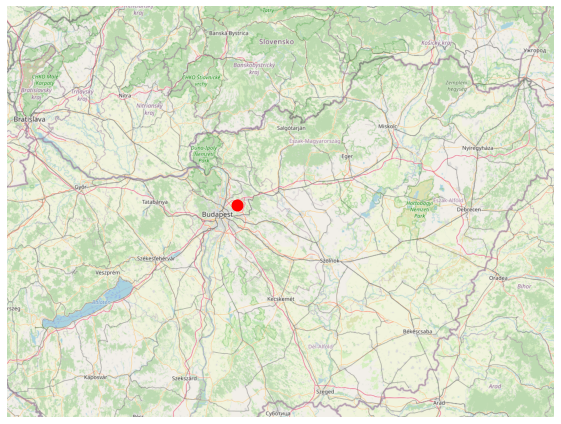

In [ ]:
x, y = map.to_pixels(47.56151, 19.23474)
ax = map.show_mpl(figsize=(8, 6))
ax.plot(x, y, 'or', ms=10, mew=2);

In [ ]:
from IPython.display import Image
map.save_png('budapest.png')   ## mentés
Image('budapest.png')          ## megjelenítés